In [4]:
import sys  
import time  
import math  
import uuid  
import numpy as np  
import matplotlib.pyplot as plt
import pickle
import plotly.graph_objs as go
from numpy import errstate  
from sklearn.datasets import fetch_openml  
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import OneHotEncoder  
from tqdm import tqdm

In [5]:
sys.setrecursionlimit(10000)

In [6]:
from varValue import VarValue
from layer import Layer
from ffnn import FFNN

In [7]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(np.uint8)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=65500,
    train_size=10,
    random_state=42,
    stratify=y
)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [10]:
X_train = np.array([[VarValue(x, varname='x_'+str(uuid.uuid4())) for x in row] for row in X_train])

In [11]:
model_ffnn = FFNN(
    loss='cce',
    batch_size=1,
    learning_rate=0.1,
    epochs=2,
    verbose=1,
)

In [12]:
model_ffnn.build_layers(
    Layer(n_neurons=4, init='uniform', activation='relu'),
    Layer(n_neurons=3, init='uniform', activation='relu'),
    Layer(n_neurons=2, init='uniform', activation='relu'),
    Layer(n_neurons=10, init='uniform', activation='softmax')
)

In [13]:
history = model_ffnn.fit(X_train, y_train)

Training Progress:  50%|█████     | 1/2 [00:07<00:07,  7.12s/epoch]

Epoch 1/2, Train Loss: 2.4442


Training Progress: 100%|██████████| 2/2 [00:15<00:00,  7.67s/epoch]

Epoch 2/2, Train Loss: 2.4232
Total Duration: 15.347302913665771


In [14]:
model_ffnn.visualize()

In [15]:
for layer in model_ffnn.layers:
    print("=====Layer======")
    for i in range(len(layer.weights)):
        print("==Neuron==")
        for j in range(len(layer.weights[0])):
            print(f"[{i}][{j}]{layer.weights[i][j].value}")

=====Layer======
==Neuron==
[0][0]0.0088
[0][1]0.025
[0][2]-0.0023
[0][3]-0.0148
==Neuron==
[1][0]0.0158
[1][1]0.0339
[1][2]-0.0174
[1][3]0.0277
==Neuron==
[2][0]-0.0318
[2][1]-0.0297
[2][2]0.002
[2][3]0.0151
==Neuron==
[3][0]-0.0195
[3][1]-0.007
[3][2]0.0219
[3][3]-0.0022
==Neuron==
[4][0]-0.0186
[4][1]0.0274
[4][2]0.0341
[4][3]0.0005
==Neuron==
[5][0]-0.0334
[5][1]0.0126
[5][2]0.0043
[5][3]-0.0053
==Neuron==
[6][0]0.0321
[6][1]0.033
[6][2]-0.0107
[6][3]0.0242
==Neuron==
[7][0]0.0222
[7][1]0.0038
[7][2]-0.0042
[7][3]0.0005
==Neuron==
[8][0]-0.0318
[8][1]0.0258
[8][2]0.0059
[8][3]0.0223
==Neuron==
[9][0]-0.0005
[9][1]0.0203
[9][2]-0.005
[9][3]-0.0342
==Neuron==
[10][0]0.0011
[10][1]-0.0037
[10][2]0.0207
[10][3]-0.0347
==Neuron==
[11][0]-0.0143
[11][1]-0.0005
[11][2]0.0005
[11][3]0.0312
==Neuron==
[12][0]0.0347
[12][1]0.0183
[12][2]-0.0323
[12][3]-0.0245
==Neuron==
[13][0]-0.0146
[13][1]-0.0023
[13][2]-0.0033
[13][3]-0.0119
==Neuron==
[14][0]0.0227
[14][1]0.0173
[14][2]-0.0179
[14][3]0.

In [16]:
for layer in model_ffnn.layers:
    for i in layer.weights:
        for j in i:
            print(j.value)

0.0088
0.025
-0.0023
-0.0148
0.0158
0.0339
-0.0174
0.0277
-0.0318
-0.0297
0.002
0.0151
-0.0195
-0.007
0.0219
-0.0022
-0.0186
0.0274
0.0341
0.0005
-0.0334
0.0126
0.0043
-0.0053
0.0321
0.033
-0.0107
0.0242
0.0222
0.0038
-0.0042
0.0005
-0.0318
0.0258
0.0059
0.0223
-0.0005
0.0203
-0.005
-0.0342
0.0011
-0.0037
0.0207
-0.0347
-0.0143
-0.0005
0.0005
0.0312
0.0347
0.0183
-0.0323
-0.0245
-0.0146
-0.0023
-0.0033
-0.0119
0.0227
0.0173
-0.0179
0.0113
0.02
0.0151
0.0277
0.0092
0.0056
0.0198
-0.0014
0.0227
0.0318
0.0041
0.0187
-0.0079
0.0056
-0.0006
-0.0104
0.0244
-0.014
0.0183
0.0302
-0.0058
-0.0013
0.0341
-0.0229
-0.0357
-0.0206
0.0344
-0.0139
0.0065
-0.0088
-0.0346
-0.0086
0.0011
-0.0017
0.011
0.0241
-0.0294
-0.0214
0.0326
-0.0263
0.0325
-0.0325
-0.0217
0.0316
0.0191
-0.0087
-0.0029
0.0345
0.0282
-0.0073
-0.0074
-0.0107
-0.0184
-0.0298
-0.0168
0.0039
-0.0306
0.0229
0.0012
-0.0238
-0.011
0.0313
0.0239
-0.0046
0.0294
-0.0095
0.0314
0.0228
-0.0162
-0.0085
0.0069
-0.0276
-0.0206
0.0188
0.0081
-0.0142

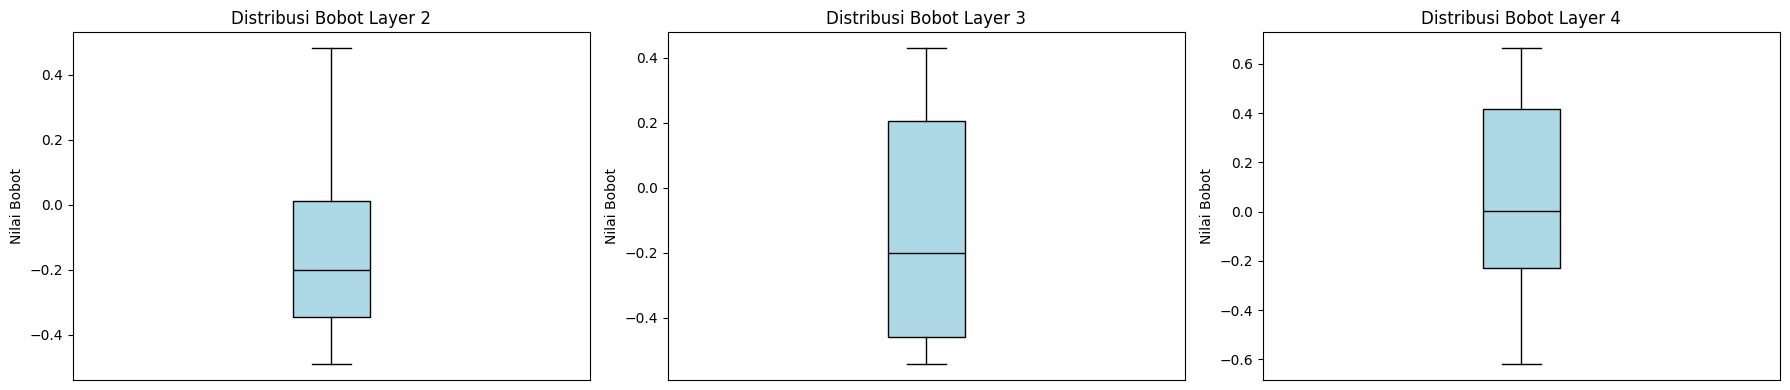

In [17]:
model_ffnn.plot_weights_distribution(layers_to_plot=[1,2,3])

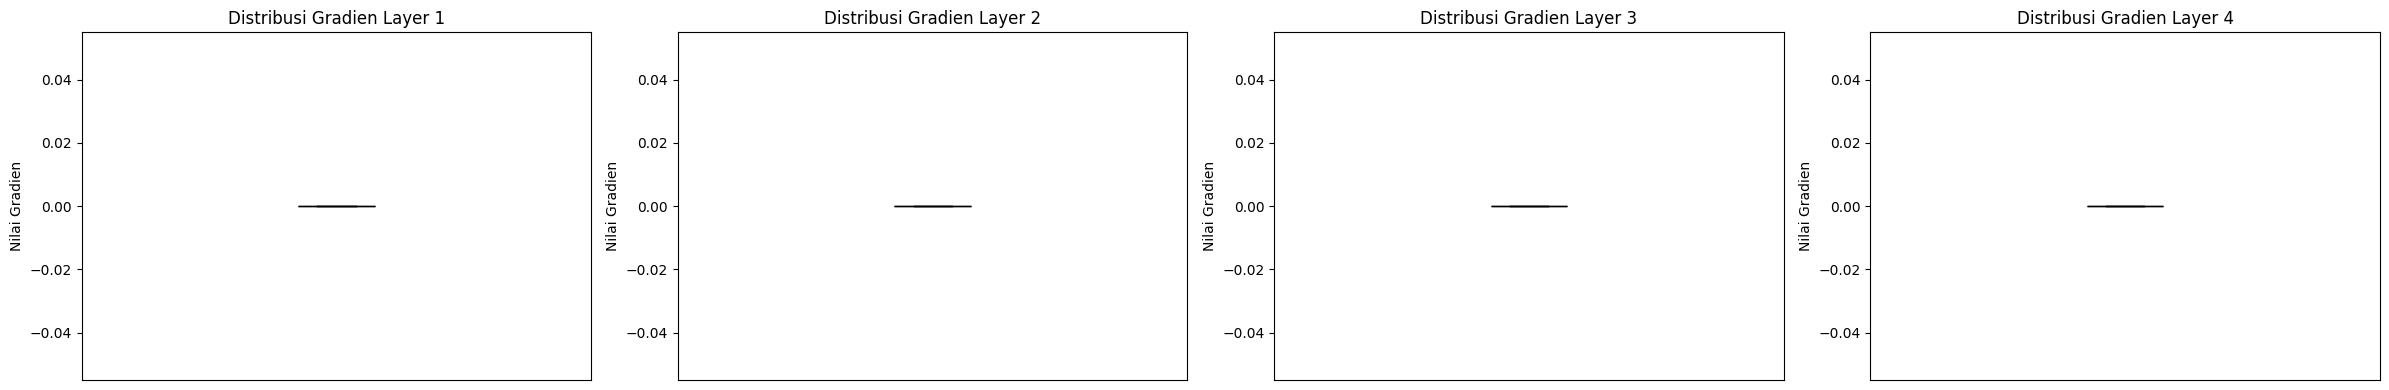

In [18]:
model_ffnn.plot_gradients_distribution(layers_to_plot=[0, 1, 2, 3])

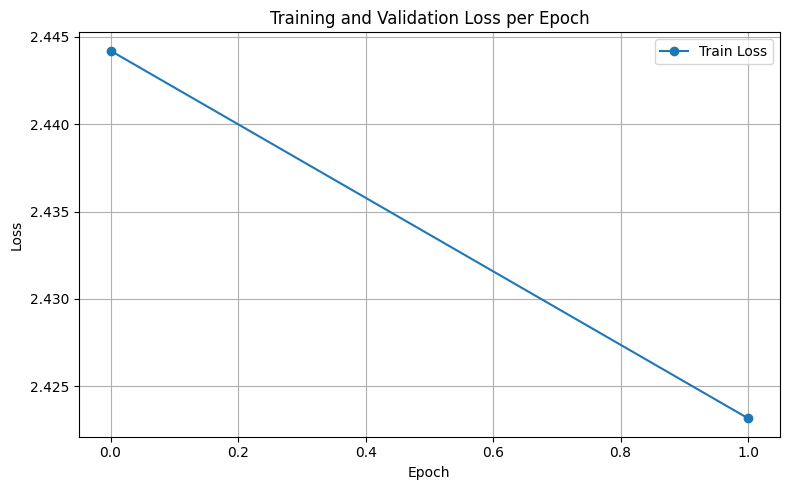

In [19]:
model_ffnn.plot_loss_history(history)

In [20]:
y_pred = model_ffnn.predict(X_test[:10])
for h in y_pred:
    max_index = np.argmax(h)
    print(max_index)

4
4
4
4
4
4
4
4
4
4


In [21]:
model_ffnn.y.shape

(10, 10)

In [22]:
for h in y_test[:10].flatten():
    print(h)

9
6
5
9
6
9
8
8
1
2


In [23]:
model_ffnn.save(filename="try1.pth")

Model saved to try1.pth


In [24]:
new_model = FFNN()
new_model.load(filename="try1.pth")

Model loaded from try1.pth


In [25]:
y_pred = new_model.predict(X_test[:10])
for h in y_pred:
    max_index = np.argmax(h)
    print(max_index)

4
4
4
4
4
4
4
4
4
4
